In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
dataK = pd.read_csv("data-2.csv")

In [3]:
data = pd.read_csv("heart_2020_cleaned.csv")

In [4]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Introduction

In this project I am going to talk about this dataset that is quite interesting is the factors that relate to heart disease. There are many numerical and boolean factors and I am going to make different visualizations to get a better feel of the data to see which factors have more effect than the other. Then after I make some graphs I hope to maybe do some training of machine learning models with different classifiers


# Motivation:

The motivation is that I wanted to see different statistics and how they relate to heart disease. I made several plots and other statistical analysis as I was wondering how different factors affected heart disease. This was from genuine curiosity as I have always been fascinated by biology and heart disease is one of those things that I wondered what caused it. I also was planning on working in a hospital for data visualizations which is why I picked a medical condition over another data set.

In [5]:

train_df, test_df = train_test_split(data, test_size=0.3, random_state=123)

In [6]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223856 entries, 92921 to 249342
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      223856 non-null  object 
 1   BMI               223856 non-null  float64
 2   Smoking           223856 non-null  object 
 3   AlcoholDrinking   223856 non-null  object 
 4   Stroke            223856 non-null  object 
 5   PhysicalHealth    223856 non-null  float64
 6   MentalHealth      223856 non-null  float64
 7   DiffWalking       223856 non-null  object 
 8   Sex               223856 non-null  object 
 9   AgeCategory       223856 non-null  object 
 10  Race              223856 non-null  object 
 11  Diabetic          223856 non-null  object 
 12  PhysicalActivity  223856 non-null  object 
 13  GenHealth         223856 non-null  object 
 14  SleepTime         223856 non-null  float64
 15  Asthma            223856 non-null  object 
 16  KidneyDisease   

<AxesSubplot:xlabel='BMI', ylabel='SleepTime'>

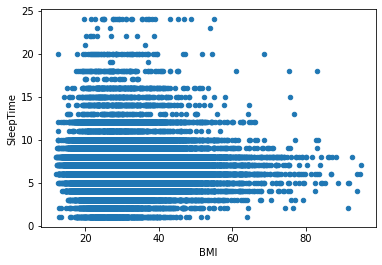

In [7]:
# your code here
data.plot.scatter(x = 'BMI', y = 'SleepTime')

# Purpose of scatter plot
This was mainly used to see if there was any correlation between sleep time and bmi partly because they were also two of the only numerical data that could be used in the plot

In [8]:

train_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,223856.000000,223856.000000,223856.000000,223856.000000
mean,28.327263,3.376488,3.891185,7.096817
std,6.361525,7.953337,7.943456,1.437735
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


# Purpose of these data figures 
These charts are the min and max of different statistics. This helps the reader get an idea of the range

In [9]:
np.max(train_df, axis=0)
    

HeartDisease                           Yes
BMI                                  94.85
Smoking                                Yes
AlcoholDrinking                        Yes
Stroke                                 Yes
PhysicalHealth                        30.0
MentalHealth                          30.0
DiffWalking                            Yes
Sex                                   Male
AgeCategory                    80 or older
Race                                 White
Diabetic            Yes (during pregnancy)
PhysicalActivity                       Yes
GenHealth                        Very good
SleepTime                             24.0
Asthma                                 Yes
KidneyDisease                          Yes
SkinCancer                             Yes
dtype: object

In [10]:
np.min(train_df, axis=0)

HeartDisease                                    No
BMI                                          12.02
Smoking                                         No
AlcoholDrinking                                 No
Stroke                                          No
PhysicalHealth                                 0.0
MentalHealth                                   0.0
DiffWalking                                     No
Sex                                         Female
AgeCategory                                  18-24
Race                American Indian/Alaskan Native
Diabetic                                        No
PhysicalActivity                                No
GenHealth                                Excellent
SleepTime                                      1.0
Asthma                                          No
KidneyDisease                                   No
SkinCancer                                      No
dtype: object

In [11]:
X_train, y_train = (
    train_df.drop(columns=["HeartDisease"]),
    train_df["HeartDisease"],
)
X_test, y_test = (
    test_df.drop(columns=["HeartDisease"]),
    test_df["HeartDisease"],
)

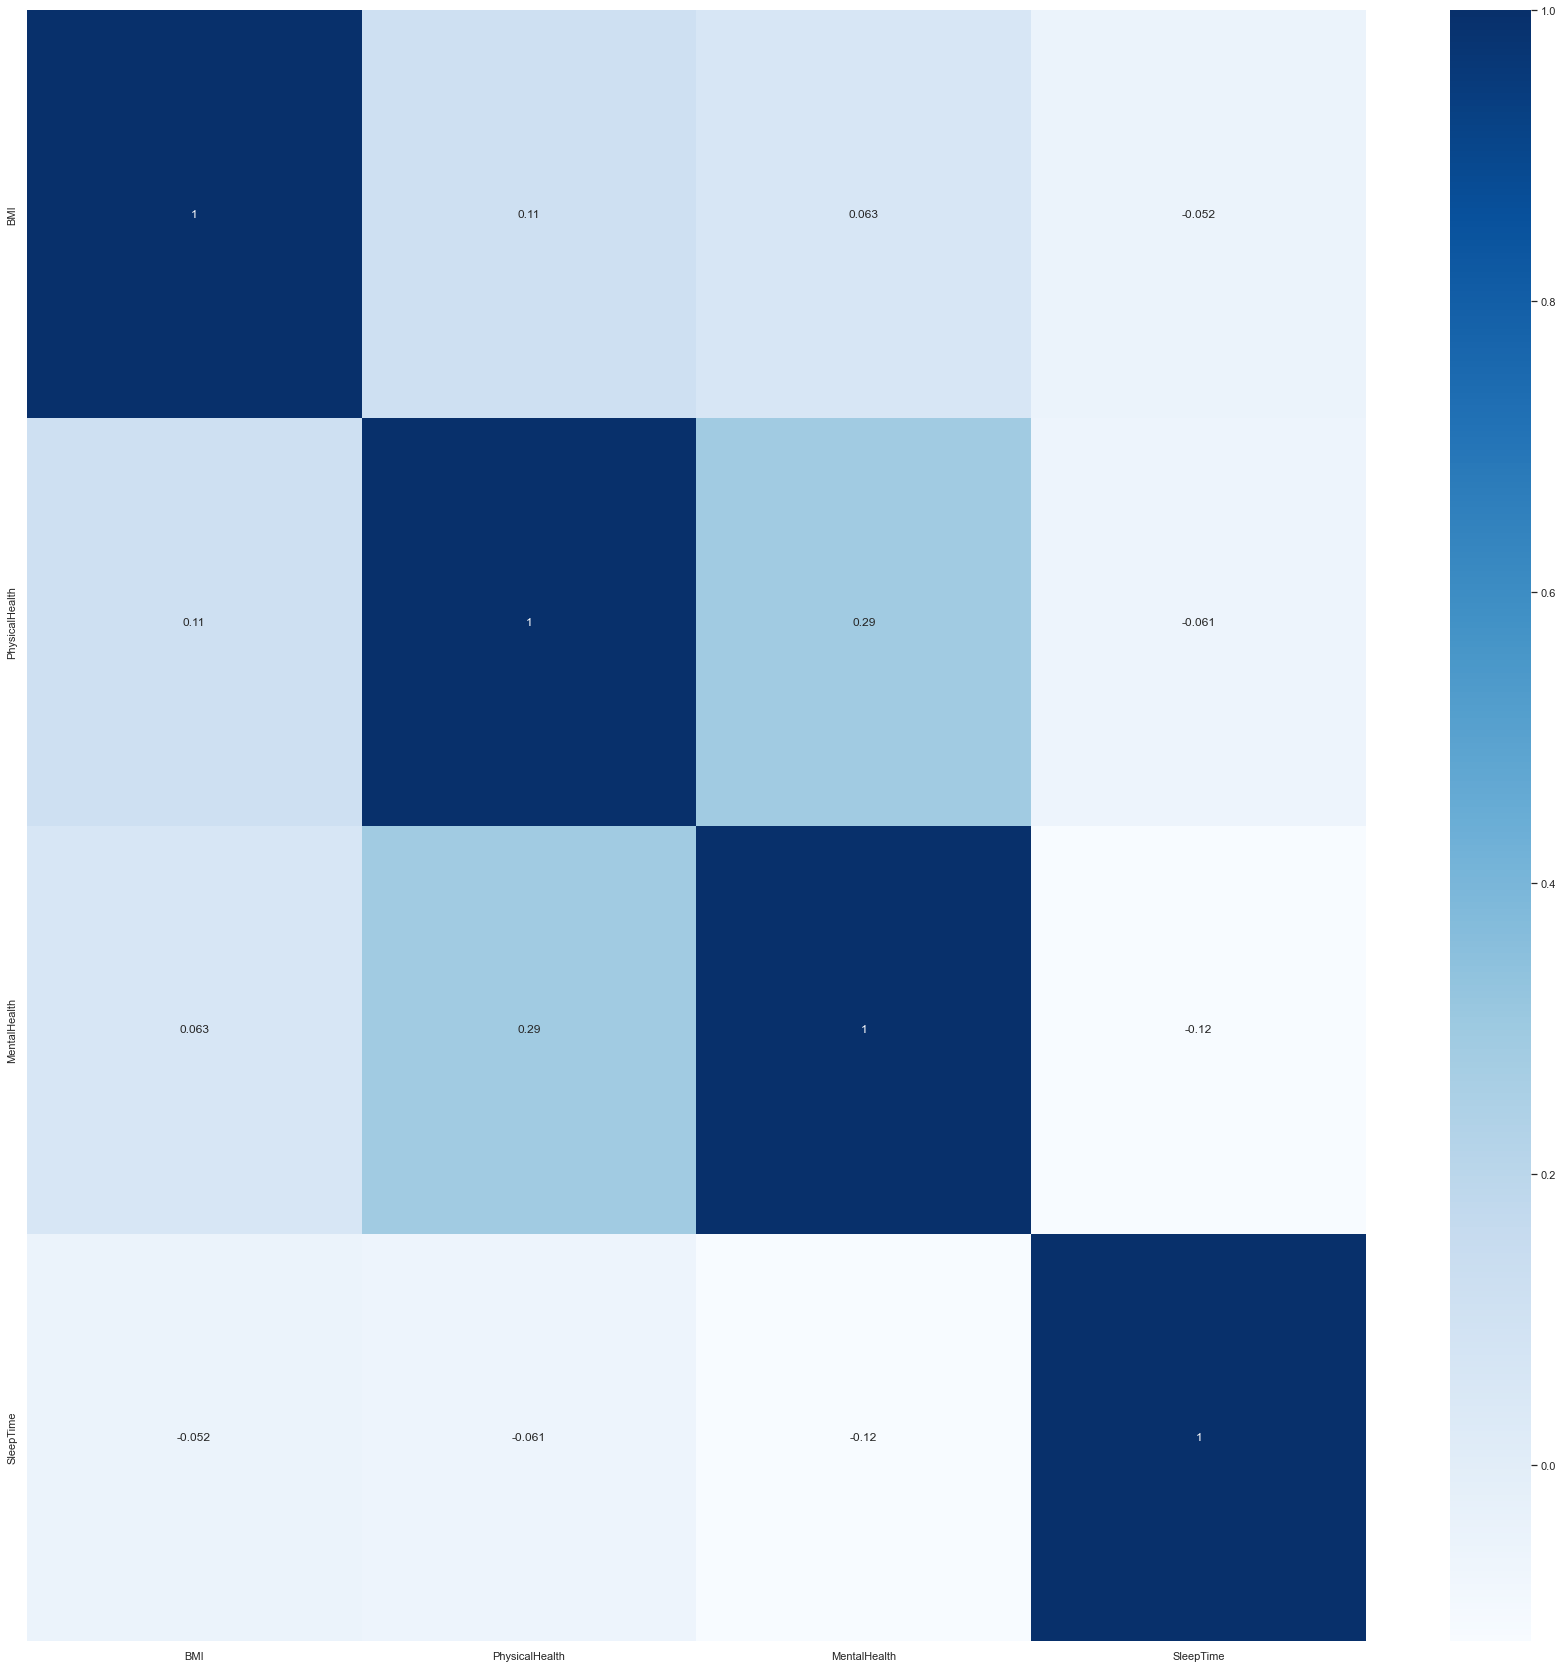

In [12]:
cor = pd.concat((y_train, X_train), axis=1).iloc[:, :30].corr()
plt.figure(figsize=(30, 30))
sns.set(font_scale=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues);

# Purpose of Figure above
This heat map represents more about the correlation between variables which is good for the exploration of what to explore

In [13]:
train_df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

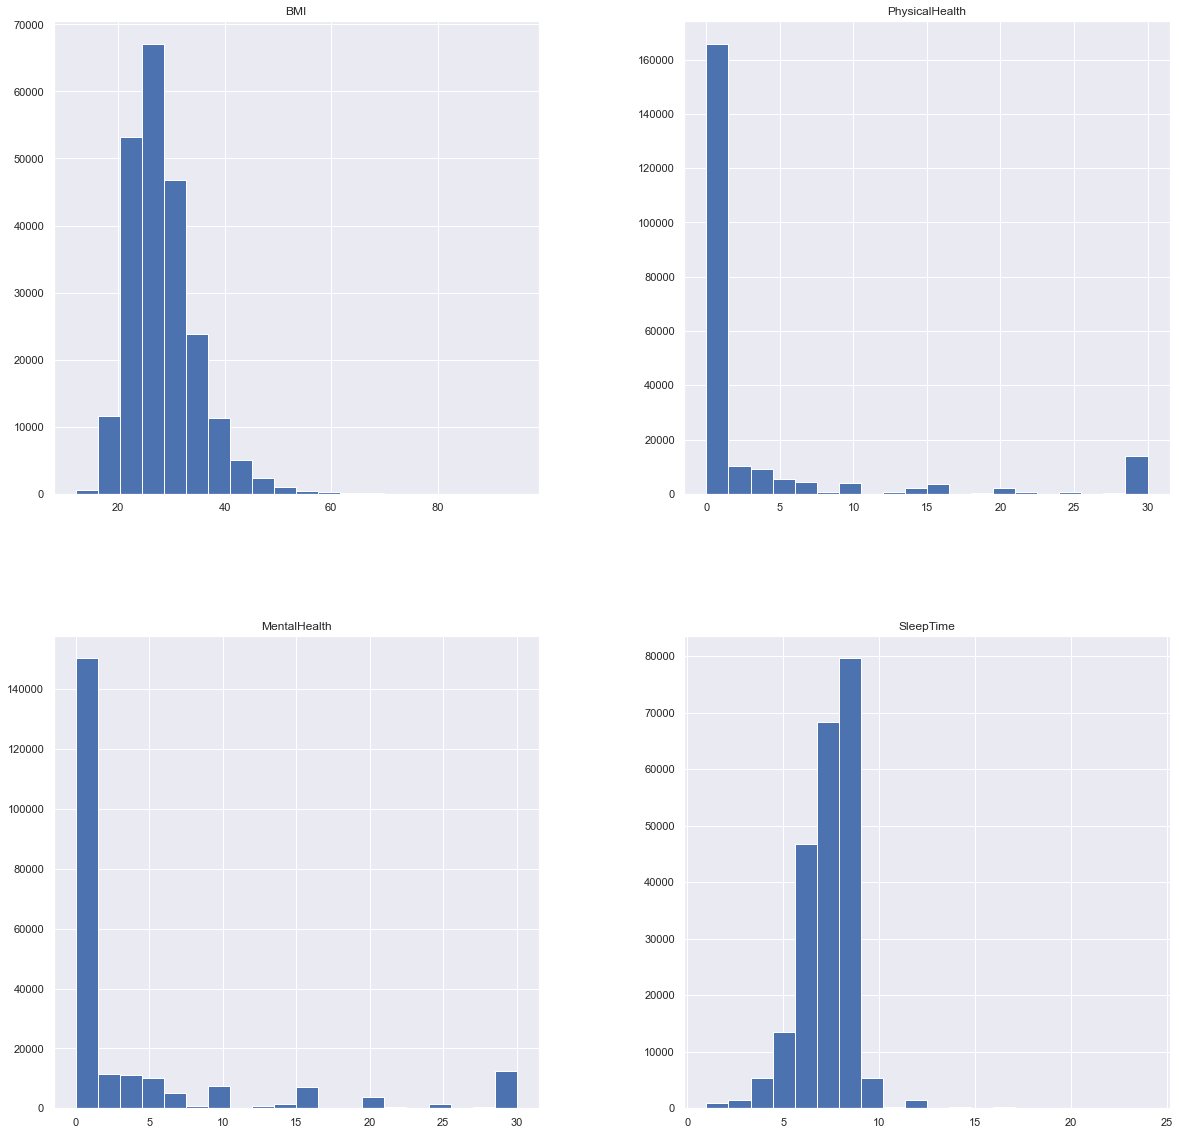

In [14]:
train_df.hist(figsize=(20, 20), bins=20);

# Purpose of Figure above
These histograms are more about the distributions of data to see if there are any trends going on

In [15]:
results = {}

In [18]:
dummy = DummyClassifier(strategy="stratified")

results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True
)
pd.DataFrame(results)

,dummy
fit_time,0.093 (+/- 0.001)
score_time,0.062 (+/- 0.002)
test_score,0.845 (+/- 0.001)
train_score,0.845 (+/- 0.001)


In [17]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

# Purpose of function
This function is helpful for cross validating the scores which means it will go through different parts of the data and 

In [19]:
# Let's identify numeric and categorical features

numeric_features = [
    "BMI",
    "PhysicalHealth",
    "MentalHealth",
    "SleepTime"
]
#binary_features = ["SEX"]
#categorical_features = ["EDUCATION", "MARRIAGE"]
target = "HeartDisease"

# Purpose of the feature selections
The purpose of selecting these variables are because I wanted numeric data to make it easier to also make the machine learning algorithms more interpretable 

# Purpose of Below
The column transformer is mainly for using preprocessing the data to make it cleaner

In [20]:
preprocessor = make_column_transformer(
   
    (StandardScaler(), numeric_features),
  
)

In [21]:
pipe_lr = make_pipeline(
     preprocessor,LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True
)
pd.DataFrame(results)

,dummy,logreg
fit_time,0.093 (+/- 0.001),0.324 (+/- 0.004)
score_time,0.062 (+/- 0.002),0.065 (+/- 0.001)
test_score,0.845 (+/- 0.001),0.788 (+/- 0.002)
train_score,0.845 (+/- 0.001),0.788 (+/- 0.003)


In [22]:

from sklearn.ensemble import RandomForestClassifier


models = {
   
    "random forest": RandomForestClassifier(class_weight="balanced", random_state=2)
    # "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=2),
    
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results[name] = mean_std_cross_val_scores(
        pipe, X_train, y_train, return_train_score=True
    )

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.093 (+/- 0.001),0.062 (+/- 0.002),0.845 (+/- 0.001),0.845 (+/- 0.001)
logreg,0.324 (+/- 0.004),0.065 (+/- 0.001),0.788 (+/- 0.002),0.788 (+/- 0.003)
random forest,10.455 (+/- 0.214),0.785 (+/- 0.020),0.801 (+/- 0.002),0.878 (+/- 0.002)


In [23]:
model = make_pipeline(preprocessor, RandomForestClassifier(random_state=123, n_estimators=1, max_depth=1))
model.fit(X_train, y_train)
feature_names = (
    numeric_features 
)
data = {
    "Importance": model.named_steps["randomforestclassifier"].feature_importances_,
}
imps = pd.DataFrame(data=data, index=feature_names,).sort_values(
    by="Importance", ascending=False
)[:10]
imps

,Importance
PhysicalHealth,1.0
BMI,0.0
MentalHealth,0.0
SleepTime,0.0


# References:
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

This is where the data is from
